# 03 Exploding Geometries

It is necessary for some operations to explode or to split the existing geometries such as LineStrings, MultiLineStrings or Polygons in single parts. 

<img src="../images/tutorial03_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/03_exploding_geometries/'

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gemgis\gemgis.py:27: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="03_exploding_geometries.zip", dirpath=file_path)

## Exploding LineStrings into single elements

LineStrings can be exploded into a list of Shapely Points using the ``explode_linestring()`` function of the vector module. The function uses the built-in Shapely attribute `linestring.coords` to extract the vertices.


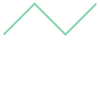

In [3]:
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import gemgis as gg

linestring = LineString([(0,0), (5,5), (10,0), (15,5)])

linestring

### Exploding the LineString

Exploding the LineString and returning a list of points. 

In [4]:
point_list = gg.vector.explode_linestring(linestring=linestring)
point_list

[<POINT (0 0)>, <POINT (5 5)>, <POINT (10 0)>, <POINT (15 5)>]

### Inspecting the elements of the returned list

Each element of the list is a Shapely Point object.

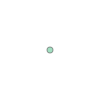

In [5]:
point_list[0]

In [6]:
point_list[0].wkt

'POINT (0 0)'

### Creating GeoDataFrame

A GeoDataFrame is created for better visualization.

In [7]:
point_gdf = gpd.GeoDataFrame(geometry=point_list)

point_gdf

,geometry
0,POINT (0.00000 0.00000)
1,POINT (5.00000 5.00000)
2,POINT (10.00000 0.00000)
3,POINT (15.00000 5.00000)


### Plotting the Data

The extracted vertices of the lines can now be plotted using ``matplotlib``. 

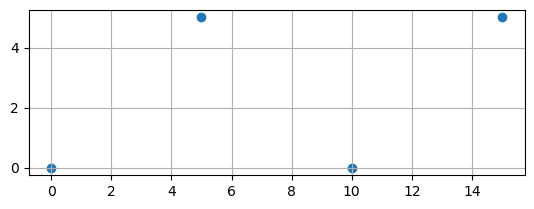

In [8]:
point_gdf.plot()
plt.grid()

## Exploding LineStrings into single elements

LineStrings can be split into a list of single LineStrings using the ``explode_linestring_to_element()`` function of the vector module. It is based on the Shapely `split()` function. 


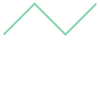

In [9]:
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import gemgis as gg

linestring = LineString([(0,0), (5,5), (10,0), (15,5)])

linestring

### Creating GeoDataFrame

Creating GeoDataFrame from LineString

In [10]:
linestring_gdf = gpd.GeoDataFrame(geometry=[linestring])

linestring_gdf

,geometry
0,"LINESTRING (0.00000 0.00000, 5.00000 5.00000, ..."


### Splitting the LineString

A list of single LineStrings will be created when exploding the input LineString. This list can easily be converted to a GeoDataFrame. It can be seen that the input LineString was split into three parts and that the end points of each part coincide with the original LineString vertices.


In [11]:
linestring_list = gg.vector.explode_linestring_to_elements(linestring=linestring)

linestring_list

TypeError: 'GeometryCollection' object is not subscriptable

### Inspecting the different elements of the returned list

The different elements of the list are Shapely LineString.

In [ ]:
linestring_list[0]

In [ ]:
linestring_list[0].wkt

In [ ]:
linestring_list[1]

In [ ]:
linestring_list[1].wkt

In [ ]:
linestring_list[2]

In [ ]:
linestring_list[2].wkt

### Creating GeoDataFrame

Creating a GeoDataFrame from the list of LineStrings.

In [ ]:
linestring_gdf = gpd.GeoDataFrame(geometry=linestring_list)

linestring_gdf['id'] = ['1', '2', '3']
linestring_gdf

### Plotting the Result

Plotting the single LineStrings. 

In [ ]:
linestring_gdf.plot(column='id', legend=True, cmap='viridis')
plt.grid()

## Exploding MultiLineStrings

MultiLineStrings can be split into a list of single LineStrings (with multiple vertices) using the ``explode_multilinestring()`` function of the vector module. This can also be achieved by accessing the LineStrings via `list(multilinestring.coords)`. If MultiLineStrings are provided as a GeoDataFrame, the function `explode_multilinestrings` can be used. This functions uses the built-in `gdf.explode()` function of GeoPandas. 


In [ ]:
from shapely.geometry import MultiLineString
import matplotlib.pyplot as plt
import geopandas as gpd
import gemgis as gg

linestrings = [((0,0), (5,5)), ((10,0), (15,5))]

multilinestring = MultiLineString(linestrings)
multilinestring

### Creating GeoDataFrame

Creating a GeoDataFrame from the MultiLineString.

In [ ]:
multilinestring_gdf = gpd.GeoDataFrame(geometry=[multilinestring])

multilinestring_gdf

### Splitting the MultiLineString

A list of single LineStrings (with multiple vertices) will be created when exploding the input MultiLineString. This list can easily be converted to a GeoDataFrame. It can be seen that the input MultiLineString was split into two single LineStrings and that the end points of each part coincide with the original MultiLineString vertices.


In [ ]:
multilinestring_list = gg.vector.explode_multilinestring(multilinestring=multilinestring)

multilinestring_list

### Inspecting the elements of the returned list

The elements of the created list are Shapely LineStrings.

In [ ]:
multilinestring_list[0]

In [ ]:
multilinestring_list[0].wkt

In [ ]:
multilinestring_list[1]

In [ ]:
multilinestring_list[1].wkt

### Creating GeoDataFrame

Creating a GeoDataFrame from the list of LineStrings.

In [ ]:
gdf = gpd.GeoDataFrame(geometry=multilinestring_list)
gdf

### Plotting the Result

Plotting the different LineStrings. 

In [ ]:
gdf.plot()
plt.grid()

### Creating GeoDataFrame

A GeoDataFrame containig multiple MultiLineStrings can be exploded to LineStrings using `explode_multilinestrings(..)`.

In [ ]:
splitted_multilinestring_gdf = gg.vector.explode_multilinestrings(pd.concat([multilinestring_gdf, multilinestring_gdf]).reset_index().drop('index', axis=1))
splitted_multilinestring_gdf

## Additional Arguments

Several additional arguments can be passed to adapt the functionality of the function. For further reference, see the [API Reference for extract_xy](https://gemgis.readthedocs.io/en/latest/api_reference/vector_data.html).

* reset_index (bool)
* drop_level0 (bool)
* drop_level1 (bool)


### Original Function
Using the original function but not resetting the index.

In [ ]:
splitted_multilinestring_gdf = gg.vector.explode_multilinestrings(pd.concat([multilinestring_gdf, multilinestring_gdf]).reset_index().drop('index', axis=1),
                                                                  reset_index=False,
                                                                  drop_level0=False,
                                                                  drop_level1=False)
splitted_multilinestring_gdf

### Resetting index but not additional columns

Resetting the index but not dropping the additional columns that were created.

In [ ]:
splitted_multilinestring_gdf = gg.vector.explode_multilinestrings(pd.concat([multilinestring_gdf, multilinestring_gdf]).reset_index().drop('index', axis=1),
                                                                 reset_index=True,
                                                                 drop_level0=False,
                                                                 drop_level1=False)
splitted_multilinestring_gdf

## Exploding Polygons

Polygons can be split into a list of single Points using the ``explode_polygon()`` function of the vector module. If Polygons are provided as a GeoDataFrame, the function `explode_polygons` can be used. This functions uses the built-in `gdf.boundary` attribute of a GeoDataFrame to convert Polygons into LineStrings and MultiLineStrings.

In [ ]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import geopandas as gpd
import gemgis as gg

polygon = Polygon([(0, 0), (10, 0), (10, 10), (0, 10)])
polygon

### Exploding the Polygon

A list of single Points will be created when exploding the input Polygon. This list can easily be converted to a GeoDataFrame. It can be seen that the input Polygon was split into five single points corresponding to the corner points of the Polygon.


In [ ]:
points_list = gg.vector.explode_polygon(polygon=polygon)
points_list

### Inspecting the elements of the returned list

The elements of the created list are Shapely Points

In [ ]:
points_list[0]

In [ ]:
points_list[0].wkt

### Creating GeoDataFrame

Creating a GeoDataFrame from the list of points.

In [ ]:
gdf = gpd.GeoDataFrame(geometry=points_list)
gdf

### Plotting the Result

Plotting the five points.

In [ ]:
gdf.plot()
plt.grid()

### Creating GeoDataFrame

A GeoDataFrame containig multiple polygons can be exploded to LineStrings and MultiLineStrings using `explode_polygons(..)`.

In [ ]:
gdf = gpd.GeoDataFrame(geometry=[polygon, polygon])
gdf

### Exploding the Polygons

Exploding the polygons into LineStrings and MultiLineStrings.

In [ ]:
boundary_gdf = gg.vector.explode_polygons(gdf=gdf)
boundary_gdf

### Plotting the Result

Plotting the LineStrings.

In [ ]:
boundary_gdf.plot()
plt.grid()

## Exploding Geometry Collections

Shapely Geometry Collections can be exploded into a list of Base Geometries using ``explode_geometry_collection(..)``.

In [ ]:
from shapely.geometry import LineString
a = LineString([(0, 0), (1, 1), (1, 2), (2, 2)])
b = LineString([(0, 0), (1, 1), (2, 1), (2, 2)])
collection = a.intersection(b)
type(collection)

In [ ]:
collection

### Explode Geometry Collection

The Shapely Geometry Collection can be exploded to a list of Base Geometries using ``explode_geometry_collection(..)``.

In [ ]:
collection_exploded = gg.vector.explode_geometry_collection(collection=collection)
collection_exploded

### Inspecting the elements in the returned list

The elements of the returned list can be inspected to show the exploded geometries of the Geometry Collection.

In [ ]:
collection_exploded[0]

In [ ]:
collection_exploded[0].wkt

In [ ]:
collection_exploded[1]

In [ ]:
collection_exploded[1].wkt

## Exploding Collections of different Geometries in GeoDataFrame

A GeoDataFrame containing different Base Geometries can be exploded to single Base Geometries. 

In [ ]:
from shapely.geometry import Polygon, LineString

line1 = LineString([(0, 0), (1, 1), (1, 2), (2, 2)])
line2 = LineString([(0, 0), (1, 1), (2, 1), (2, 2)])
collection = a.intersection(b)
polygon = Polygon([(0, 0), (10, 0), (10, 10), (0, 10)])

### Creating GeoDataFrame

In [ ]:
gdf = gpd.GeoDataFrame(geometry=[line1, line2, collection, polygon])
gdf

### Exploding Geometry Collection GeoDataFrame

A GeoDataFrame containing different Base Geometries or Geometry Collections can be exploded using ``explode_geometry_collections(..)``.

In [ ]:
gdf_exploded = gg.vector.explode_geometry_collections(gdf=gdf)
gdf_exploded